In [482]:
import pandas as pd
import numpy as np

# Make numpy values easier to read
# np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import r2_score

In [483]:
print(f'Tensorflow version is {tf.__version__}')

Tensorflow version is 2.13.0


## In Memory Data

In [484]:
abalone_train = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [485]:
abalone_features = abalone_train.copy()

In [486]:
abalone_features.shape

(3320, 8)

In [487]:
abalone_labels = abalone_features.pop('Age')

In [488]:
abalone_features.shape

(3320, 7)

In [489]:
abalone_features = np.array(abalone_features)
abalone_features.shape

(3320, 7)

### Model Building

In [490]:
abalone_model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])

from sklearn.metrics import r2_score

abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam(),
                    metrics=['mean_absolute_error']) 

In [491]:
history = abalone_model.fit(abalone_features, abalone_labels, epochs=30)

Epoch 1/30
104/104 [==============================] - 1s 1ms/step - loss: 66.2612 - mean_absolute_error: 7.4229
Epoch 2/30
104/104 [==============================] - 0s 1ms/step - loss: 12.7061 - mean_absolute_error: 2.6281
Epoch 3/30
104/104 [==============================] - 0s 1ms/step - loss: 8.5499 - mean_absolute_error: 2.1261
Epoch 4/30
104/104 [==============================] - 0s 1ms/step - loss: 8.0568 - mean_absolute_error: 2.0522
Epoch 5/30
104/104 [==============================] - 0s 1ms/step - loss: 7.6151 - mean_absolute_error: 1.9807
Epoch 6/30
104/104 [==============================] - 0s 1ms/step - loss: 7.2493 - mean_absolute_error: 1.9392
Epoch 7/30
104/104 [==============================] - 0s 939us/step - loss: 6.9581 - mean_absolute_error: 1.9099
Epoch 8/30
104/104 [==============================] - 0s 1ms/step - loss: 6.7834 - mean_absolute_error: 1.8763
Epoch 9/30
104/104 [==============================] - 0s 1ms/step - loss: 6.6264 - mean_absolute_error: 1.87

In [492]:
abalone_model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                512       
                                                                 
 dense_41 (Dense)            (None, 1)                 65        
                                                                 
Total params: 577 (2.25 KB)
Trainable params: 577 (2.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [493]:
# abalone_model.save('abalone_model.keras')

In [494]:
preds = abalone_model.predict(abalone_features)

# metric = tf.keras.metrics.R2Score(
#     class_aggregation='uniform_average',
#     num_regressors=0,
#     name='r2_score',
#     dtype=None
# )

y_true = abalone_labels
y_pred = preds

y_true = y_true.values[:, tf.newaxis]

result = r2_score(y_true, y_pred)

# metric.update_state(y_true, y_pred)
# result = metric.result()

print("Coefficient of determination :", round(result, 3))

104/104 [==============================] - 0s 943us/step
Coefficient of determination : 0.498


## Pre-Processing of inputs using Keras (only Normalization)

In [495]:
normalize = layers.Normalization(axis = -1)
normalize.adapt(abalone_features)

In [496]:
abalone_features.shape

(3320, 7)

### Model Building

In [497]:
norm_abalone_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64),
  layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics=['mean_absolute_error']
                          )

history = norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 1ms/step - loss: 91.7641 - mean_absolute_error: 9.2068
Epoch 2/10
104/104 [==============================] - 0s 957us/step - loss: 52.7692 - mean_absolute_error: 6.7706
Epoch 3/10
104/104 [==============================] - 0s 1ms/step - loss: 16.2607 - mean_absolute_error: 3.2097
Epoch 4/10
104/104 [==============================] - 0s 1ms/step - loss: 5.7603 - mean_absolute_error: 1.6262
Epoch 5/10
104/104 [==============================] - 0s 1ms/step - loss: 5.0330 - mean_absolute_error: 1.6175
Epoch 6/10
104/104 [==============================] - 0s 1ms/step - loss: 4.9551 - mean_absolute_error: 1.6201
Epoch 7/10
104/104 [==============================] - 0s 1ms/step - loss: 4.9339 - mean_absolute_error: 1.6218
Epoch 8/10
104/104 [==============================] - 0s 1ms/step - loss: 4.9237 - mean_absolute_error: 1.6184
Epoch 9/10
104/104 [==============================] - 0s 1ms/step - loss: 4.9211 - mean_absolute_error: 1.6

In [498]:
norm_abalone_model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_14 (Normaliz  (None, 7)                 15        
 ation)                                                          
                                                                 
 dense_42 (Dense)            (None, 64)                512       
                                                                 
 dense_43 (Dense)            (None, 1)                 65        
                                                                 
Total params: 592 (2.32 KB)
Trainable params: 577 (2.25 KB)
Non-trainable params: 15 (64.00 Byte)
_________________________________________________________________


In [499]:
# norm_abalone_model.save('norm_abalone_model.keras')

In [500]:
preds = norm_abalone_model.predict(abalone_features)

# metric = tf.keras.metrics.R2Score(
#     class_aggregation='uniform_average',
#     num_regressors=0,
#     name='r2_score',
#     dtype=None
# )

y_true = abalone_labels
y_pred = preds

y_true = y_true.values[:, tf.newaxis]

result = r2_score(y_true, y_pred)

# metric.update_state(y_true, y_pred)
# result = metric.result()

print("Coefficient of determination :", round(result, 3))

104/104 [==============================] - 0s 1000us/step
Coefficient of determination : 0.521


## Mixed Data Types pre-prcoessing

In [501]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [502]:
titanic.survived.value_counts()

0    384
1    243
Name: survived, dtype: int64

In [503]:
titanic.shape

(627, 10)

In [504]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

In [505]:
titanic_features.shape

(627, 9)

In [506]:
titanic_labels.shape

(627,)

In [507]:
inputs = {}

for name, column in titanic_features.items():
    dtype = column.dtype
    if dtype == object:
        dtype = tf.string
    else:
        dtype = tf.float32

    inputs[name] = tf.keras.Input(shape=(1,), name = name, dtype = dtype)

inputs

{'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>,
 'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>}

In [508]:
titanic_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 627 non-null    object 
 1   age                 627 non-null    float64
 2   n_siblings_spouses  627 non-null    int64  
 3   parch               627 non-null    int64  
 4   fare                627 non-null    float64
 5   class               627 non-null    object 
 6   deck                627 non-null    object 
 7   embark_town         627 non-null    object 
 8   alone               627 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 44.2+ KB


### 1<sup>st</sup> Method

In [509]:
numeric_inputs = {name:input_ for name, input_ in inputs.items() if input_.dtype == tf.float32}

In [510]:
numeric_inputs

{'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>}

In [511]:
x = layers.Concatenate()(list(numeric_inputs.values()))

In [512]:
x

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'concatenate_20')>

In [513]:
norm = layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))

In [514]:
norm.mean

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[29.631308  ,  0.5454546 ,  0.37958536, 34.3854    ]],
      dtype=float32)>

In [515]:
all_numeric_inputs = norm(x)
all_numeric_inputs

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_15')>

In [516]:
preprocessed_inputs = [all_numeric_inputs]

In [517]:
inputs

{'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>,
 'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>}

In [518]:
for name, input_ in inputs.items():
    if input_.dtype == tf.float32:
        continue

    lookup = layers.StringLookup(vocabulary = np.unique(titanic_features[name]), output_mode = 'one_hot')
    print(lookup.get_vocabulary())
    # one_hot = layers.CategoryEncoding(num_tokens = lookup.vocabulary_size())

    x = lookup(input_)
    # x = one_hot(x)
    preprocessed_inputs.append(x)

['[UNK]', 'female', 'male']
['[UNK]', 'First', 'Second', 'Third']
['[UNK]', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'unknown']
['[UNK]', 'Cherbourg', 'Queenstown', 'Southampton', 'unknown']
['[UNK]', 'n', 'y']


In [519]:
preprocessed_inputs

[<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_15')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'string_lookup_35')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'string_lookup_36')>,
 <KerasTensor: shape=(None, 9) dtype=float32 (created by layer 'string_lookup_37')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'string_lookup_38')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'string_lookup_39')>]

In [520]:
preprocessed_inputs = layers.Concatenate()(preprocessed_inputs)

In [521]:
preprocessed_inputs

<KerasTensor: shape=(None, 28) dtype=float32 (created by layer 'concatenate_21')>

In [522]:
titanic_preprocessing_1 = tf.keras.Model(inputs, preprocessed_inputs)

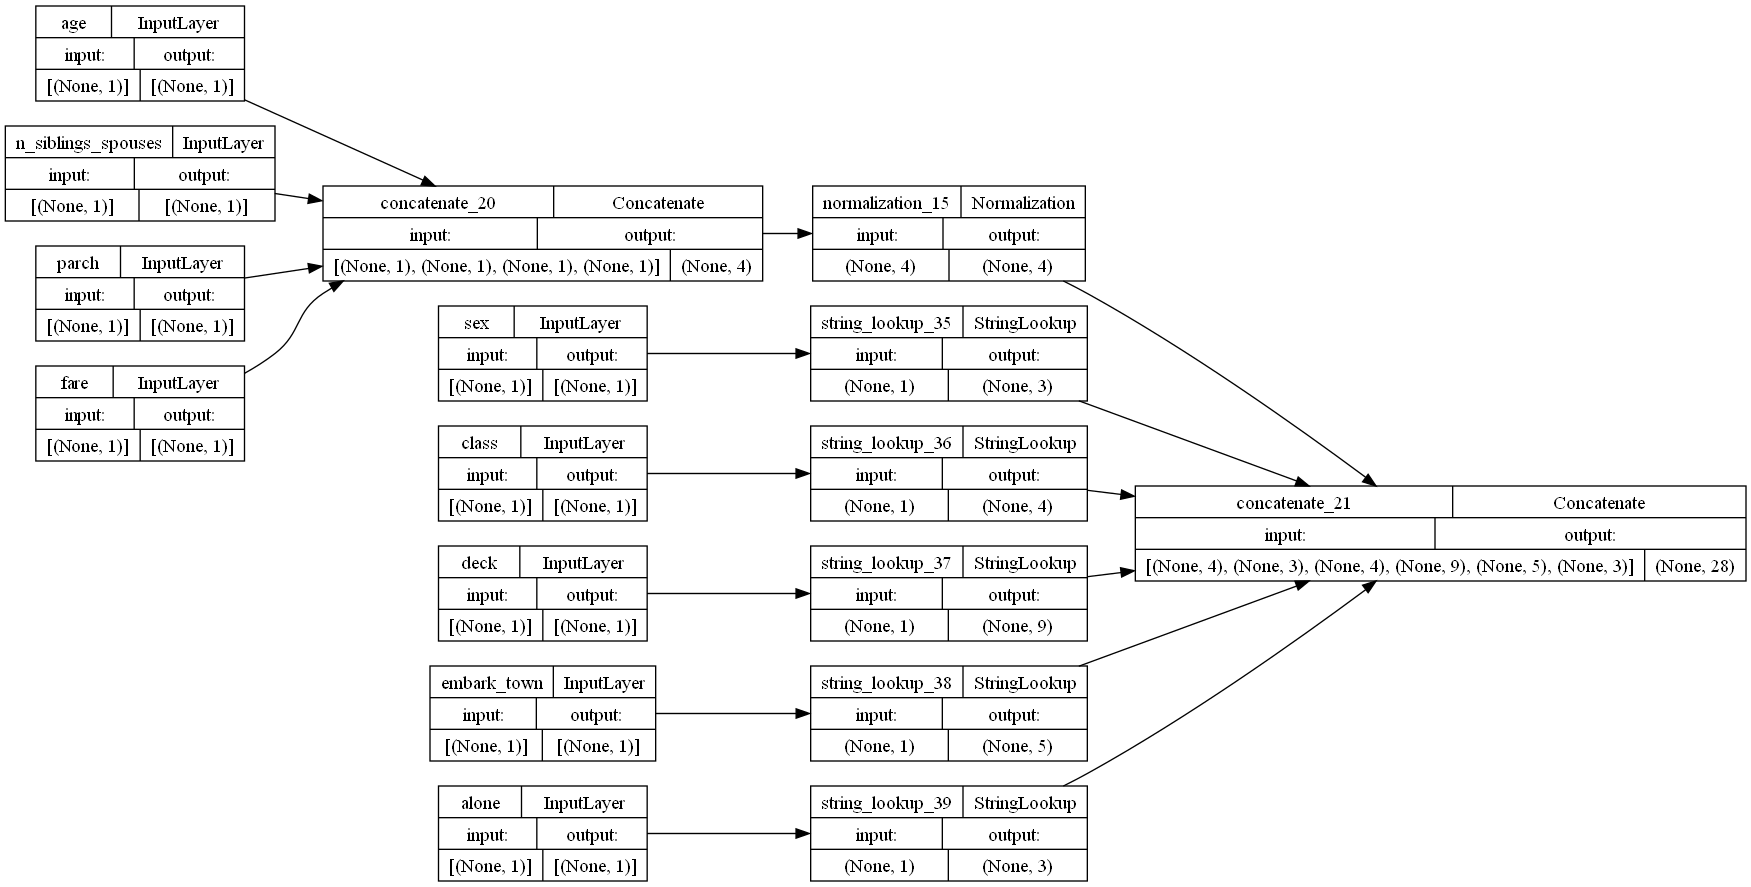

In [523]:
tf.keras.utils.plot_model(
    titanic_preprocessing_1,
    to_file='model_image/pre_processing_titanic_model_1.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='LR',
    dpi=96,
    layer_range=None,
)

In [524]:
titanic_features_dict = {name: np.array(value) 
                         for name, value in titanic_features.items()}

In [525]:
# titanic_features_dict

In [526]:
features_dict = {name:values[:2] for name, values in titanic_features_dict.items()}
features_dict

{'sex': array(['male', 'female'], dtype=object),
 'age': array([22., 38.]),
 'n_siblings_spouses': array([1, 1], dtype=int64),
 'parch': array([0, 0], dtype=int64),
 'fare': array([ 7.25  , 71.2833]),
 'class': array(['Third', 'First'], dtype=object),
 'deck': array(['unknown', 'C'], dtype=object),
 'embark_town': array(['Southampton', 'Cherbourg'], dtype=object),
 'alone': array(['n', 'n'], dtype=object)}

In [527]:
titanic_preprocessing_1(features_dict)

<tf.Tensor: shape=(2, 28), dtype=float32, numpy=
array([[-0.610415  ,  0.395198  , -0.4790527 , -0.49740276,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ],
       [ 0.6693971 ,  0.395198  , -0.4790527 ,  0.6763534 ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ]], dtype=float32)>

In [528]:
titanic_preprocessing_1.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 age (InputLayer)            [(None, 1)]                  0         []                            
                                                                                                  
 n_siblings_spouses (InputL  [(None, 1)]                  0         []                            
 ayer)                                                                                            
                                                                                                  
 parch (InputLayer)          [(None, 1)]                  0         []                            
                                                                                                  
 fare (InputLayer)           [(None, 1)]                  0         []                     

In [529]:
titanic_preprocessing_1.weights

[<tf.Variable 'mean:0' shape=(4,) dtype=float32, numpy=array([29.631308  ,  0.5454546 ,  0.37958536, 34.3854    ], dtype=float32)>,
 <tf.Variable 'variance:0' shape=(4,) dtype=float32, numpy=
 array([1.5629588e+02, 1.3228940e+00, 6.2784487e-01, 2.9761584e+03],
       dtype=float32)>,
 <tf.Variable 'count:0' shape=() dtype=int64, numpy=627>]

### 2<sup>nd</sup> Method

In [530]:
# numeric_inputs = {}
all_inputs = []
for name, input_ in inputs.items():
    if input_.dtype == tf.float32:
        norm = layers.Normalization(name = "norm_" + name)
        norm.adapt(np.array(titanic[name])[:, tf.newaxis])
        # numeric_inputs[name] = norm(input_)
        x = norm(input_)
        all_inputs.append(x)

In [531]:
all_inputs

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'norm_age')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'norm_n_siblings_spouses')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'norm_parch')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'norm_fare')>]

In [532]:
np.unique(titanic_features['sex'])[:, tf.newaxis]

array([['female'],
       ['male']], dtype=object)

In [533]:
for name, input_ in inputs.items():
    if input_.dtype == tf.float32:
        continue

    
    lookup = layers.StringLookup(output_mode = 'one_hot', name = "string_lookup_" + name) #vocabulary = np.unique(titanic_features[name]), 
    lookup.adapt(titanic_features[name])
    print(lookup.get_vocabulary())
    # one_hot = layers.CategoryEncoding(num_tokens = lookup.vocabulary_size())

    x = lookup(input_)
    # x = one_hot(x)
    all_inputs.append(x)

['[UNK]', 'male', 'female']
['[UNK]', 'Third', 'First', 'Second']
['[UNK]', 'unknown', 'C', 'B', 'E', 'D', 'A', 'F', 'G']
['[UNK]', 'Southampton', 'Cherbourg', 'Queenstown', 'unknown']
['[UNK]', 'y', 'n']


In [534]:
all_inputs

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'norm_age')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'norm_n_siblings_spouses')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'norm_parch')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'norm_fare')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'string_lookup_sex')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'string_lookup_class')>,
 <KerasTensor: shape=(None, 9) dtype=float32 (created by layer 'string_lookup_deck')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'string_lookup_embark_town')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'string_lookup_alone')>]

In [535]:
all_inputs = layers.Concatenate()(all_inputs)

In [536]:
all_inputs

<KerasTensor: shape=(None, 28) dtype=float32 (created by layer 'concatenate_22')>

In [537]:
titanic_preprocessing_2 = tf.keras.Model(inputs, all_inputs)

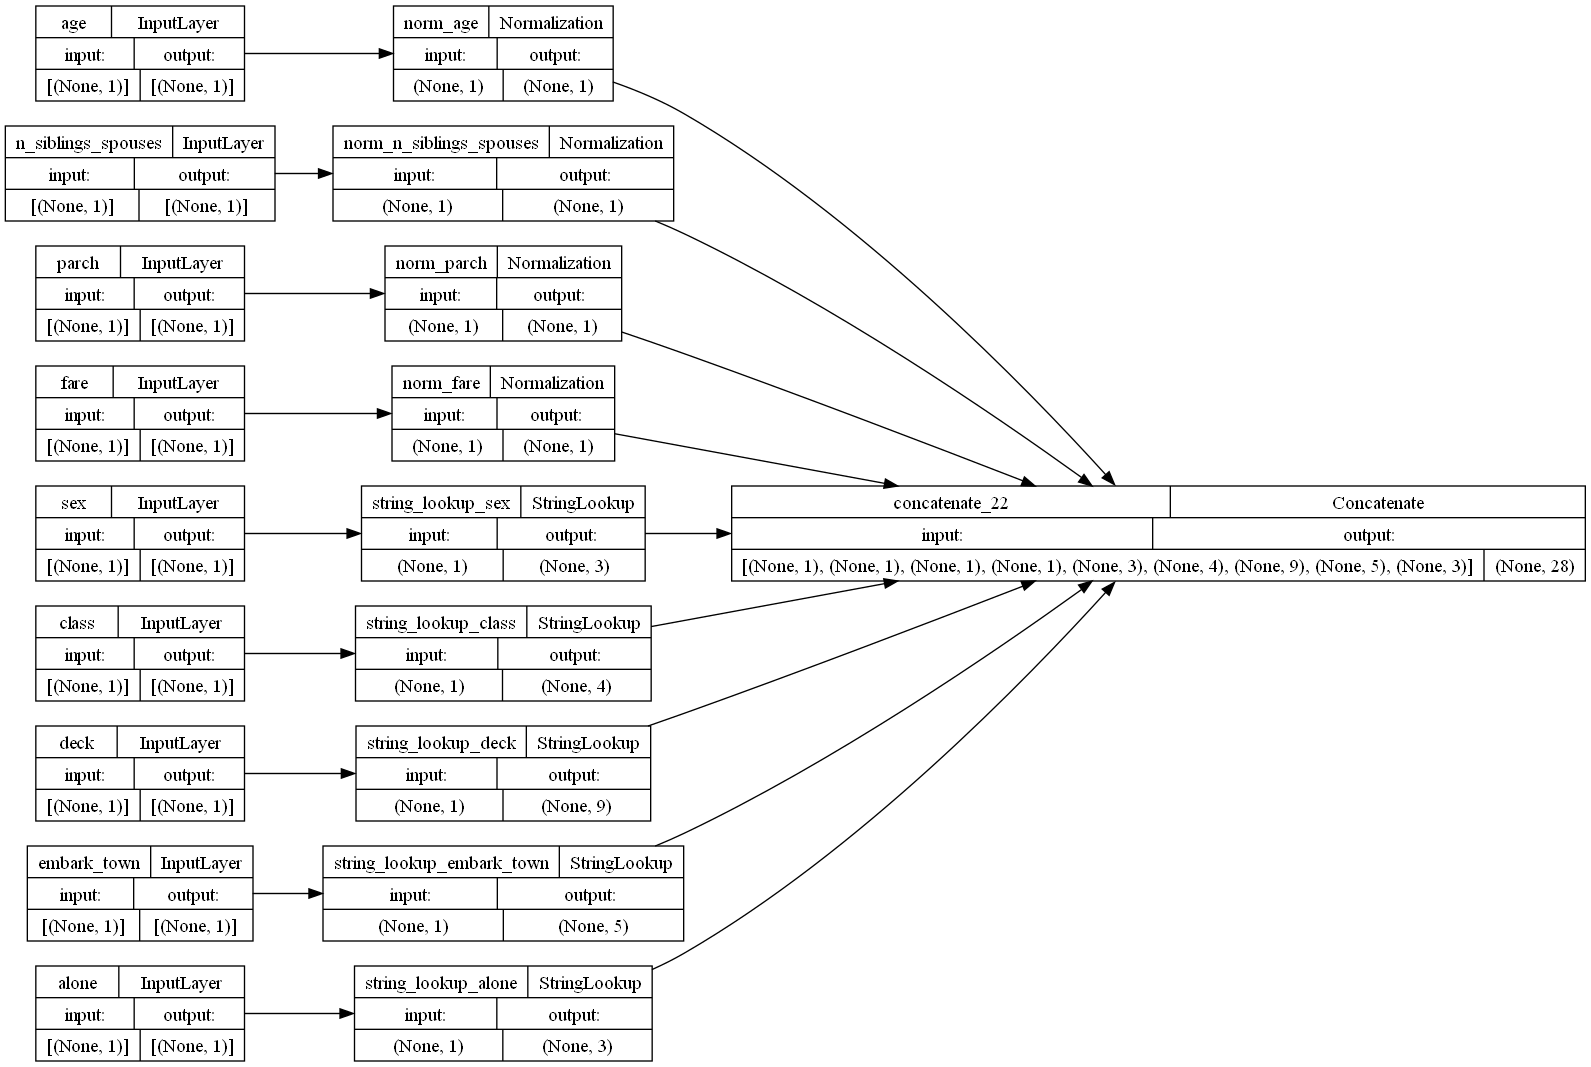

In [538]:
tf.keras.utils.plot_model(
    titanic_preprocessing_2,
    to_file='model_image/pre_processing_titanic_model_2.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='LR',
    dpi=96,
    layer_range=None,
)

In [539]:
titanic_features_dict = {name: np.array(value) 
                         for name, value in titanic_features.items()}

In [540]:
# titanic_features_dict

In [541]:
features_dict = {name:values[:2] for name, values in titanic_features_dict.items()}
features_dict

{'sex': array(['male', 'female'], dtype=object),
 'age': array([22., 38.]),
 'n_siblings_spouses': array([1, 1], dtype=int64),
 'parch': array([0, 0], dtype=int64),
 'fare': array([ 7.25  , 71.2833]),
 'class': array(['Third', 'First'], dtype=object),
 'deck': array(['unknown', 'C'], dtype=object),
 'embark_town': array(['Southampton', 'Cherbourg'], dtype=object),
 'alone': array(['n', 'n'], dtype=object)}

In [542]:
titanic_preprocessing_2(features_dict)

<tf.Tensor: shape=(2, 28), dtype=float32, numpy=
array([[-0.610415 ,  0.395198 , -0.4790527, -0.4974028,  0.       ,
         1.       ,  0.       ,  0.       ,  1.       ,  0.       ,
         0.       ,  0.       ,  1.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  1.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  1.       ],
       [ 0.6693971,  0.395198 , -0.4790527,  0.6763534,  0.       ,
         0.       ,  1.       ,  0.       ,  0.       ,  1.       ,
         0.       ,  0.       ,  0.       ,  1.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  1.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  1.       ]], dtype=float32)>

In [543]:
titanic_preprocessing_2.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 age (InputLayer)            [(None, 1)]                  0         []                            
                                                                                                  
 n_siblings_spouses (InputL  [(None, 1)]                  0         []                            
 ayer)                                                                                            
                                                                                                  
 parch (InputLayer)          [(None, 1)]                  0         []                            
                                                                                                  
 fare (InputLayer)           [(None, 1)]                  0         []                     

In [544]:
titanic_preprocessing_2.weights

[<tf.Variable 'mean:0' shape=(1,) dtype=float32, numpy=array([29.631308], dtype=float32)>,
 <tf.Variable 'variance:0' shape=(1,) dtype=float32, numpy=array([156.29588], dtype=float32)>,
 <tf.Variable 'count:0' shape=() dtype=int64, numpy=627>,
 <tf.Variable 'mean:0' shape=(1,) dtype=float32, numpy=array([0.5454546], dtype=float32)>,
 <tf.Variable 'variance:0' shape=(1,) dtype=float32, numpy=array([1.322894], dtype=float32)>,
 <tf.Variable 'count:0' shape=() dtype=int64, numpy=627>,
 <tf.Variable 'mean:0' shape=(1,) dtype=float32, numpy=array([0.37958536], dtype=float32)>,
 <tf.Variable 'variance:0' shape=(1,) dtype=float32, numpy=array([0.62784487], dtype=float32)>,
 <tf.Variable 'count:0' shape=() dtype=int64, numpy=627>,
 <tf.Variable 'mean:0' shape=(1,) dtype=float32, numpy=array([34.3854], dtype=float32)>,
 <tf.Variable 'variance:0' shape=(1,) dtype=float32, numpy=array([2976.1582], dtype=float32)>,
 <tf.Variable 'count:0' shape=() dtype=int64, numpy=627>,

In [545]:
# for i in range(len(titanic_preprocessing_2.weights)):
#     titanic_preprocessing_2.weights[i]._handle_name = titanic_preprocessing_2.weights[i].name + "_" + str(i)

### Model Building

In [546]:
def titanic_model(preprocessing_head, inputs):
    body = tf.keras.Sequential([
    layers.Dense(64, activation = 'sigmoid'),
    layers.Dense(1, activation = 'sigmoid')
    ])

    preprocessed_inputs = preprocessing_head(inputs)
    result = body(preprocessed_inputs)
    model = tf.keras.Model(inputs, result, name = 'titanic_model')

    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
            optimizer=tf.keras.optimizers.Adam(),
            metrics = ['accuracy']
                 )
    return model

titanic_model = titanic_model(titanic_preprocessing_2, inputs)

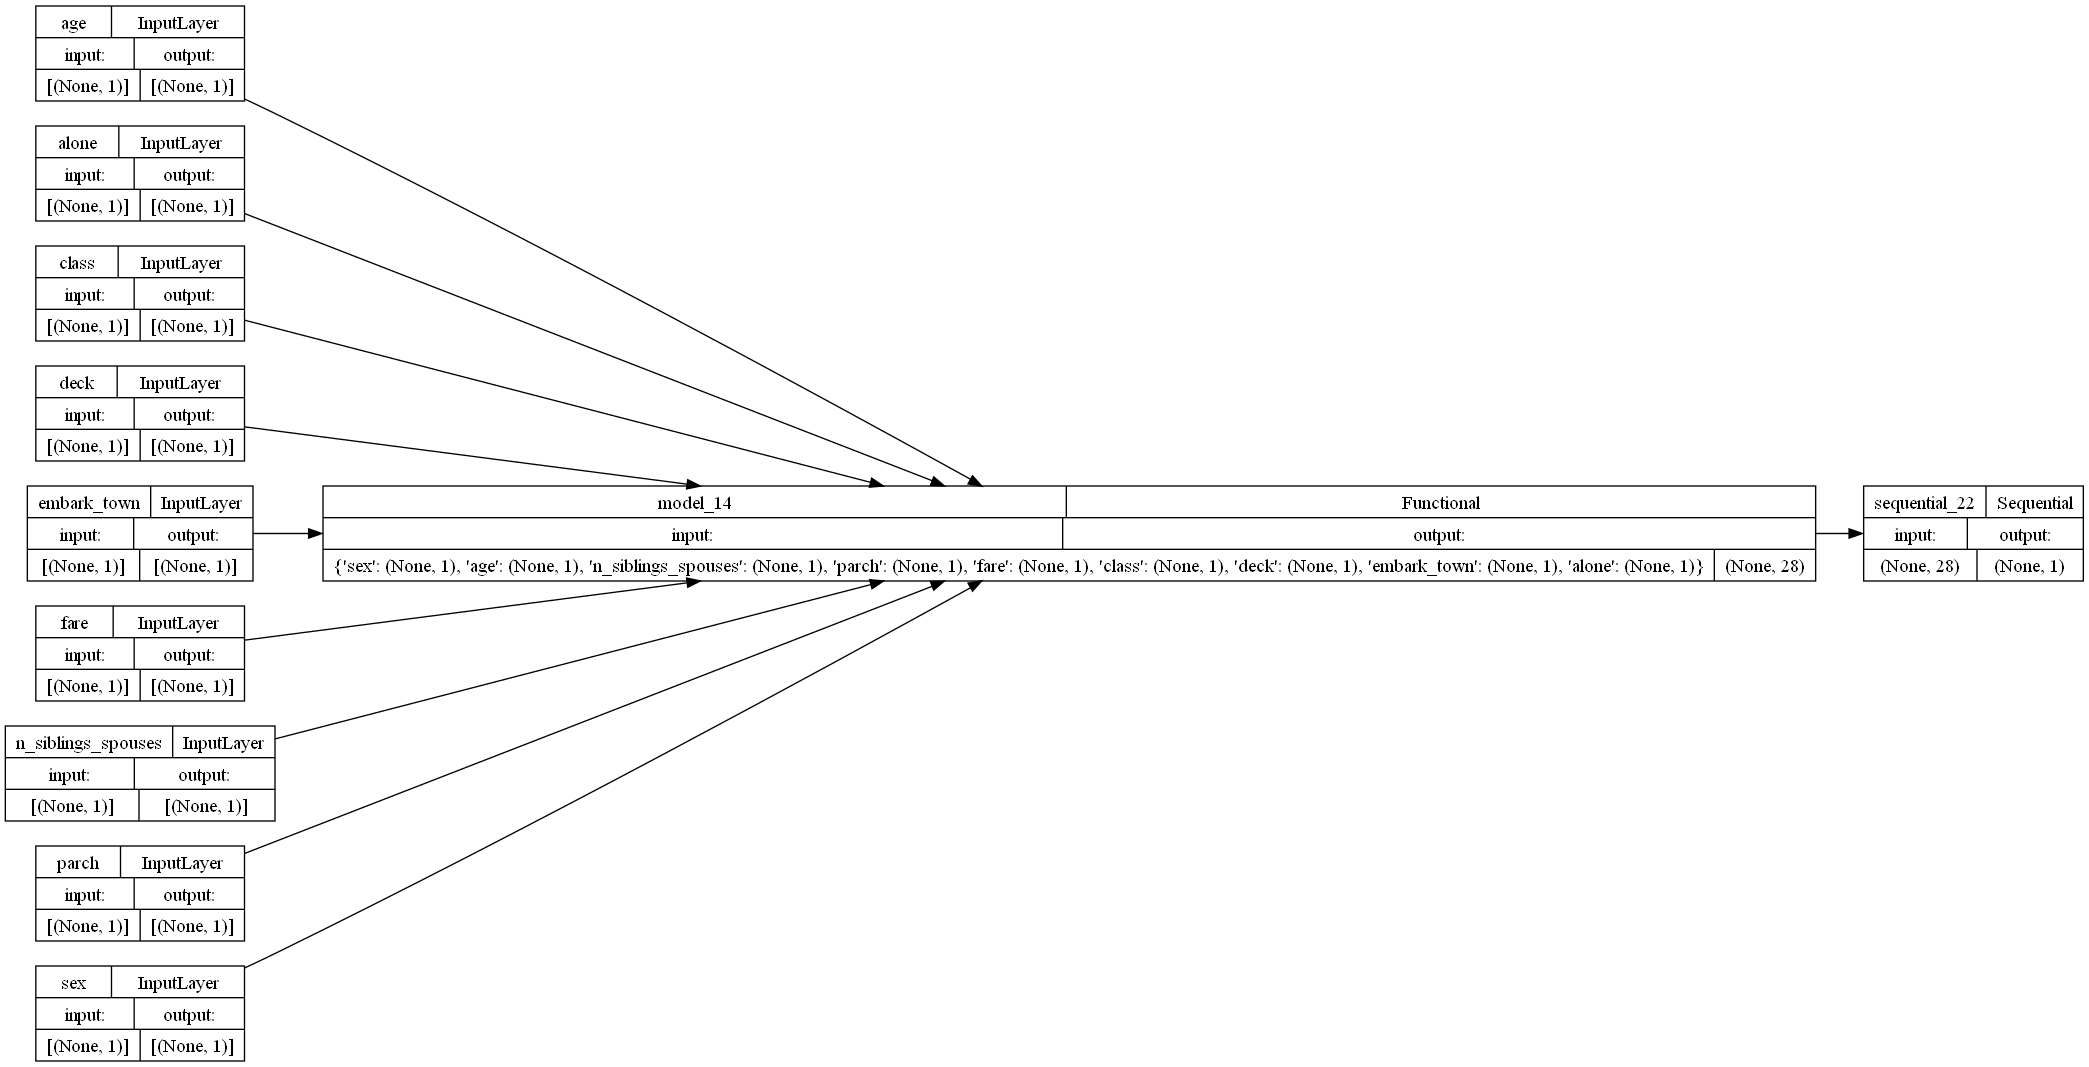

In [547]:
tf.keras.utils.plot_model(
    titanic_model,
    to_file='model_image/final_titanic_model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='LR',
    dpi=96,
    layer_range=None,
)

In [548]:
titanic_model.fit(x = titanic_features_dict, y = titanic_labels, epochs = 50)

Epoch 1/50
20/20 [==============================] - 1s 2ms/step - loss: 0.7517 - accuracy: 0.4354
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.5965
Epoch 3/50
20/20 [==============================] - 0s 1ms/step - loss: 0.6208 - accuracy: 0.6332
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5977 - accuracy: 0.6858
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5780 - accuracy: 0.7321
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5614 - accuracy: 0.7416
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.7416
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5335 - accuracy: 0.7640
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5223 - accuracy: 0.7576
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5104 - accuracy: 0.7703
Epoch 11/50
20/20 [

In [549]:
titanic_model.summary()

Model: "titanic_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 age (InputLayer)            [(None, 1)]                  0         []                            
                                                                                                  
 alone (InputLayer)          [(None, 1)]                  0         []                            
                                                                                                  
 class (InputLayer)          [(None, 1)]                  0         []                            
                                                                                                  
 deck (InputLayer)           [(None, 1)]                  0         []                            
                                                                                      

### Saving Model

In [550]:
titanic_model

In [551]:
titanic_model.save('titanic_model.keras')
reloaded = tf.keras.models.load_model('titanic_model.keras')

In [552]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
print(features_dict)
before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before-after) < 1e-3
print(before)
print(after)

{'sex': array(['male'], dtype=object), 'age': array([22.]), 'n_siblings_spouses': array([1], dtype=int64), 'parch': array([0], dtype=int64), 'fare': array([7.25]), 'class': array(['Third'], dtype=object), 'deck': array(['unknown'], dtype=object), 'embark_town': array(['Southampton'], dtype=object), 'alone': array(['n'], dtype=object)}
tf.Tensor([[0.11562786]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.11562786]], shape=(1, 1), dtype=float32)


## Usage of tf.data

In [553]:
import itertools

def slices(features):
    for i in itertools.count():
        # For each feature take index `i`
        example = {name:values[i] for name, values in features.items()}
        yield example

In [554]:
for example in slices(titanic_features_dict):
    for name, value in example.items():
        print(f"{name:<19s}: {value}")
    break

sex                : male
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : Third
deck               : unknown
embark_town        : Southampton
alone              : n


In [555]:
features_ds = tf.data.Dataset.from_tensor_slices(titanic_features_dict)

In [556]:
titanic_ds = tf.data.Dataset.from_tensor_slices((titanic_features_dict, titanic_labels))

In [557]:
i = 0
for example in titanic_ds.as_numpy_iterator():
    if i == 1:
        print(example)
    i+=1

({'sex': b'female', 'age': 38.0, 'n_siblings_spouses': 1, 'parch': 0, 'fare': 71.2833, 'class': b'First', 'deck': b'C', 'embark_town': b'Cherbourg', 'alone': b'n'}, 1)


In [558]:
titanic_batches = titanic_ds.shuffle(len(titanic_labels)).batch(32)

In [559]:
i = 0
for example in titanic_batches.as_numpy_iterator():
    if i == 1:
        print(example[0])
    i+=1

{'sex': array([b'male', b'female', b'male', b'male', b'male', b'female', b'male',
       b'male', b'male', b'male', b'female', b'male', b'male', b'male',
       b'female', b'female', b'female', b'male', b'male', b'male',
       b'male', b'male', b'male', b'female', b'female', b'male',
       b'female', b'male', b'female', b'male', b'female', b'male'],
      dtype=object), 'age': array([36. , 33. , 33. ,  4. , 24. , 17. , 24. , 33. , 49. , 61. , 14.5,
       28. , 28. , 39. , 18. , 28. , 42. , 28. , 20.5, 36. , 31. ,  3. ,
       28. , 28. , 19. , 23. , 63. , 28. , 16. , 28. , 28. , 32. ]), 'n_siblings_spouses': array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 3, 0, 0, 1, 0, 0, 0, 8, 0], dtype=int64), 'parch': array([0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 2, 0], dtype=int64), 'fare': array([ 78.85  ,  27.75  ,  20.525 ,  11.1333, 247.5208,  57.    ,
        79.2   ,   8.6542,  56.9292,   6.2375, 

In [560]:
titanic_model.fit(titanic_batches, epochs = 30)

Epoch 1/30
20/20 [==============================] - 1s 2ms/step - loss: 0.4170 - accuracy: 0.8293
Epoch 2/30
20/20 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.8214
Epoch 3/30
20/20 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.8293
Epoch 4/30
20/20 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.8293
Epoch 5/30
20/20 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8198
Epoch 6/30
20/20 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8278
Epoch 7/30
20/20 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.8293
Epoch 8/30
20/20 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8262
Epoch 9/30
20/20 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8278
Epoch 10/30
20/20 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8278
Epoch 11/30
20/20 [

### From a single file

In [561]:
titanic_file_path = tf.keras.utils.get_file(
    "train.csv", 
    "https://storage.googleapis.com/tf-datasets/titanic/train.csv", cache_dir = '.')

In [562]:
print(titanic_file_path)

.\datasets\train.csv


In [563]:
titanic_csv_ds = tf.data.experimental.make_csv_dataset(
    titanic_file_path,
    batch_size=5, # Artificially small to make examples easier to show.
    label_name='survived',
    num_epochs=1,
    ignore_errors=False,)

In [564]:
titanic_csv_ds

<_PrefetchDataset element_spec=(OrderedDict([('sex', TensorSpec(shape=(None,), dtype=tf.string, name=None)), ('age', TensorSpec(shape=(None,), dtype=tf.float32, name=None)), ('n_siblings_spouses', TensorSpec(shape=(None,), dtype=tf.int32, name=None)), ('parch', TensorSpec(shape=(None,), dtype=tf.int32, name=None)), ('fare', TensorSpec(shape=(None,), dtype=tf.float32, name=None)), ('class', TensorSpec(shape=(None,), dtype=tf.string, name=None)), ('deck', TensorSpec(shape=(None,), dtype=tf.string, name=None)), ('embark_town', TensorSpec(shape=(None,), dtype=tf.string, name=None)), ('alone', TensorSpec(shape=(None,), dtype=tf.string, name=None))]), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [565]:
for batch, label in titanic_csv_ds.take(1):
    for key, value in batch.items():
        print(f"{key:20s}: {value}")
    print()
    print(f"{'label':20s}: {label}")

sex                 : [b'female' b'male' b'female' b'male' b'male']
age                 : [27. 36.  4. 24. 36.]
n_siblings_spouses  : [0 0 1 0 0]
parch               : [0 0 1 0 0]
fare                : [10.5    26.3875 23.      8.05    7.8958]
class               : [b'Second' b'First' b'Second' b'Third' b'Third']
deck                : [b'E' b'E' b'unknown' b'unknown' b'unknown']
embark_town         : [b'Southampton' b'Southampton' b'Southampton' b'Southampton'
 b'Southampton']
alone               : [b'y' b'y' b'n' b'y' b'y']

label               : [1 1 1 0 0]
